In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.arima.model import ARIMA

In [13]:
# Step 1: Define and estimate the nonlinear function (Hammerstein structure)
def nonlinear_function(params, x):
    a, b = params
    return a * x**2 + b * x

In [16]:
# Example data
np.random.seed(0)
nobs = 200
time = np.arange(nobs)
input_signal = np.sin(0.1 * time)  # Example input signal (sinusoidal)
noise = np.random.normal(0, 0.1, size=nobs)  # White noise
output = 0.5 * input_signal**2 + 0.7 * input_signal + noise  # Nonlinear function + noise

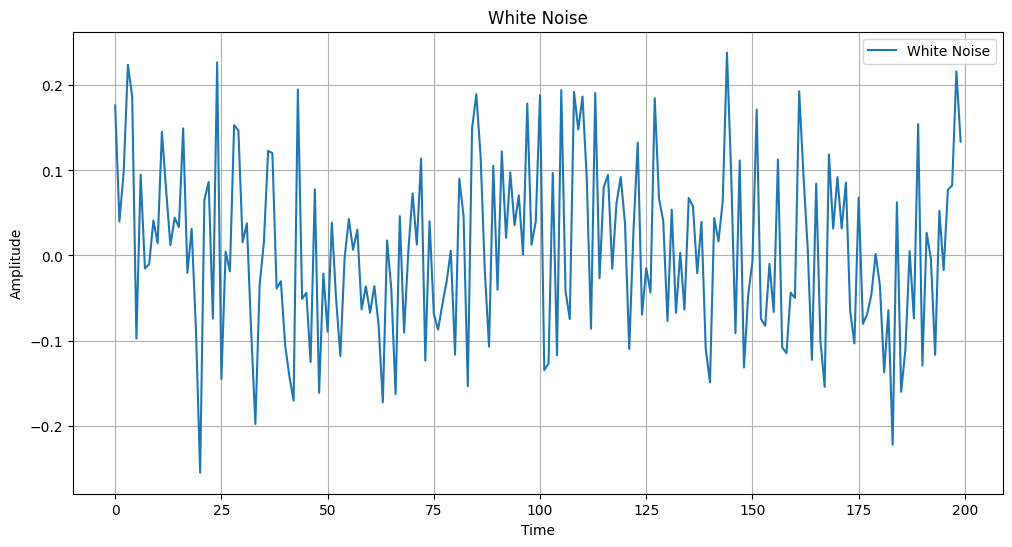

In [17]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, noise, label='White Noise')
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Example of using nonlinear regression (you may need to adjust this based on your specific data and model complexity)
params_initial = [0.5, 0.7]  # Initial guess for parameters
params_estimated, _ = minimize(lambda params: np.sum((nonlinear_function(params, input_signal) - output)**2), params_initial).x

# Step 2: Estimate the linear dynamics (ARMAX model)
# Example of using ARIMA for ARMAX modeling (adjust orders as needed)
arima_model = ARIMA(output, order=(1, 0, 1))
results = arima_model.fit()

# Step 3: Validate and visualize the identified model
predictions = results.predict()


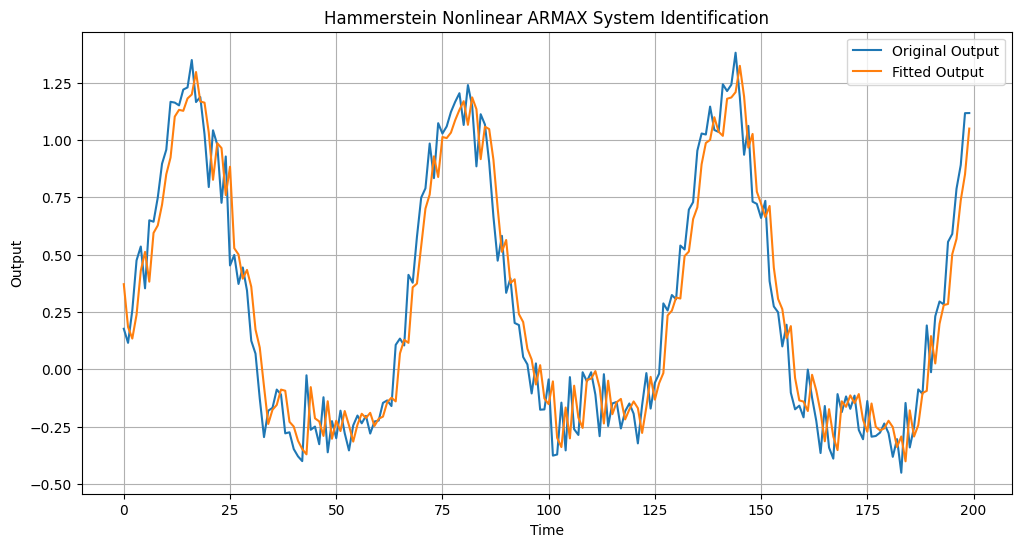

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  94.639
Date:                Sun, 30 Jun 2024   AIC                           -181.278
Time:                        18:08:41   BIC                           -168.084
Sample:                             0   HQIC                          -175.938
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3709      0.327      1.136      0.256      -0.269       1.011
ar.L1          0.9740      0.017     56.746      0.000       0.940       1.008
ma.L1         -0.1796      0.080     -2.253      0.0

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(time, output, label='Original Output')
plt.plot(time, predictions, label='Fitted Output')
plt.title('Hammerstein Nonlinear ARMAX System Identification')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print model summary (if applicable)
print(results.summary())

## model the ecm circuit

In [21]:
from scipy import signal

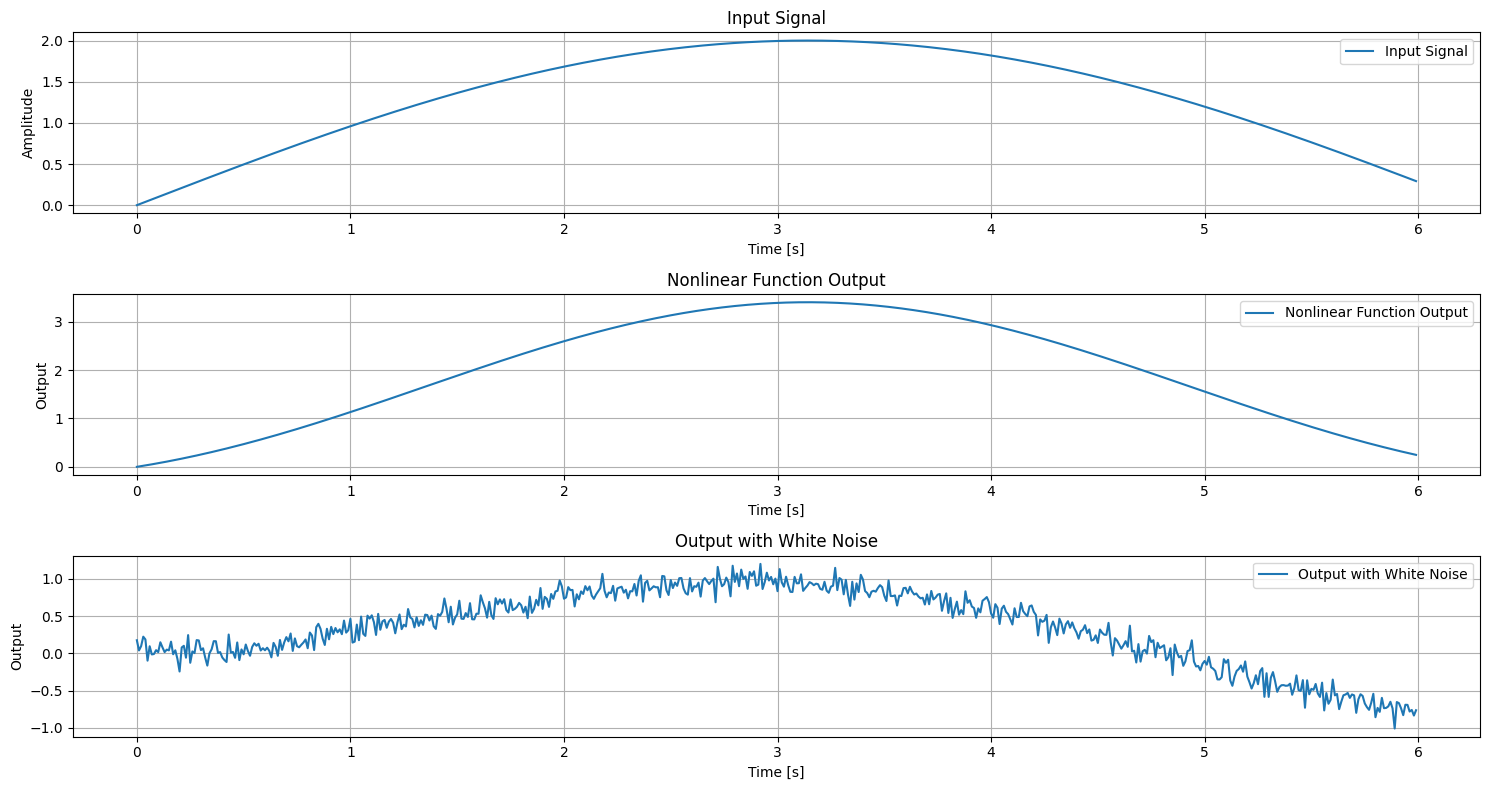

First few values of the input signal:
[0.         0.00999996 0.01999967 0.02999888 0.03999733]
First few values of the nonlinear output signal:
[0.         0.00704997 0.01419976 0.02144918 0.02879803]
First few values of the final output signal:
[0.17640523 0.04001572 0.0979436  0.22429831 0.18717298]


In [27]:
# Parameters
R_in = 1.0  # Ohms
R_p = 1.0   # Ohms
C_p = 1.0   # Farads
sampling_rate = 100  # Hz
T = 1.0 / sampling_rate
nobs = 600  # Number of observations

# Generate input signal
time = np.arange(nobs) * T
input_signal = 2*np.sin(0.5 * time)  # Example input signal (sinusoidal)

# Generate white noise
np.random.seed(0)
white_noise = np.random.normal(0, 0.1, size=nobs)

# Nonlinear function C(z)
def nonlinear_function(x):
    return 0.5 * x**2 + 0.7 * x

# Apply nonlinear function to the input signal
nonlinear_output = nonlinear_function(input_signal)

# Linear system in s-domain (R_in + parallel combination of R_p and C_p)
num = [R_p * C_p, 0]
den = [R_in * R_p * C_p, R_in + R_p, 1]
system = signal.TransferFunction(num, den)

# Convert to z-domain
system_discrete = system.to_discrete(T)

# Simulate the linear part of the system with the output of the nonlinear function
_, y_lin = signal.dlsim(system_discrete, nonlinear_output)

# Add noise to the linear system output
output = y_lin.flatten() + white_noise

# Plotting
plt.figure(figsize=(15, 8))

# Plot input signal
plt.subplot(3, 1, 1)
plt.plot(time, input_signal, label='Input Signal')
plt.title('Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot nonlinear function output
plt.subplot(3, 1, 2)
plt.plot(time, nonlinear_output, label='Nonlinear Function Output')
plt.title('Nonlinear Function Output')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# Plot output signal with noise
plt.subplot(3, 1, 3)
plt.plot(time, output, label='Output with White Noise')
plt.title('Output with White Noise')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary of the first few values
print("First few values of the input signal:")
print(input_signal[:5])
print("First few values of the nonlinear output signal:")
print(nonlinear_output[:5])
print("First few values of the final output signal:")
print(output[:5])


In [ ]:
Nicol